# Physics 2A: Conservation Laws

In [2]:
from kan import *
from kan.utils import batch_jacobian, create_dataset_from_data
import numpy as np

model = KAN(width=[2,1], seed=42)

# the model learns the Hamiltonian H = 1/2 * (x**2 + p**2)
x = torch.rand(1000,2) * 2 - 1
flow = torch.cat([x[:,[1]], -x[:,[0]]], dim=1)

def pred_fn(model, x):
    grad = batch_jacobian(model, x, create_graph=True)
    grad_normalized = grad/torch.linalg.norm(grad, dim=1, keepdim=True)
    return grad_normalized

loss_fn = lambda grad_normalized, flow: torch.mean(torch.sum(flow * grad_normalized, dim=1)**2)


dataset = create_dataset_from_data(x, flow)
model.fit(dataset, steps=20, pred_fn=pred_fn, loss_fn=loss_fn);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.07e-04 | test_loss: 1.17e-04 | reg: 4.12e+00 | : 100%|█| 20/20 [00:01<00:00, 16.52it

saving model version 0.1


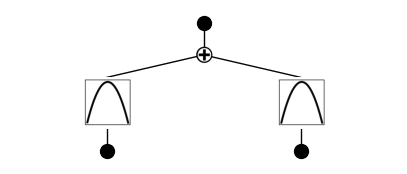

In [3]:
model.plot()

In [4]:
model.auto_symbolic()

fixing (0,0,0) with x^2, r2=1.0000003576278687, c=2
fixing (0,1,0) with x^2, r2=1.0000004768371582, c=2
saving model version 0.2


In [5]:
from kan.utils import ex_round
ex_round(model.symbolic_formula()[0][0], 3)

-1.191*x_1**2 - 1.191*x_2**2 + 2.329